# Linear Regression

## Dataset
The dataset you will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training.csv" and "LifeExpectancy_test.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test.csv"

Features :
- Year : from 2000 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training.csv", contains 1154 rows and 14 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test.csv", contains 495 rows and 13 columns. This is the test set which only contains the features.<br/>

Your goal is to predict Life expectancy based on the features.

In [1]:
import numpy as np
import pandas as pd

Load the training data "LifeExpectancy_training.csv" in Colab and View the first 5 lines

In [2]:
from google.colab import files
uploaded = files.upload()

Saving LifeExpectancy_training.csv to LifeExpectancy_training.csv


In [3]:
# Load the training data
import io
df = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training.csv']))

In [4]:
# Show the first 5 lines
df.head(5)

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,71.4


## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

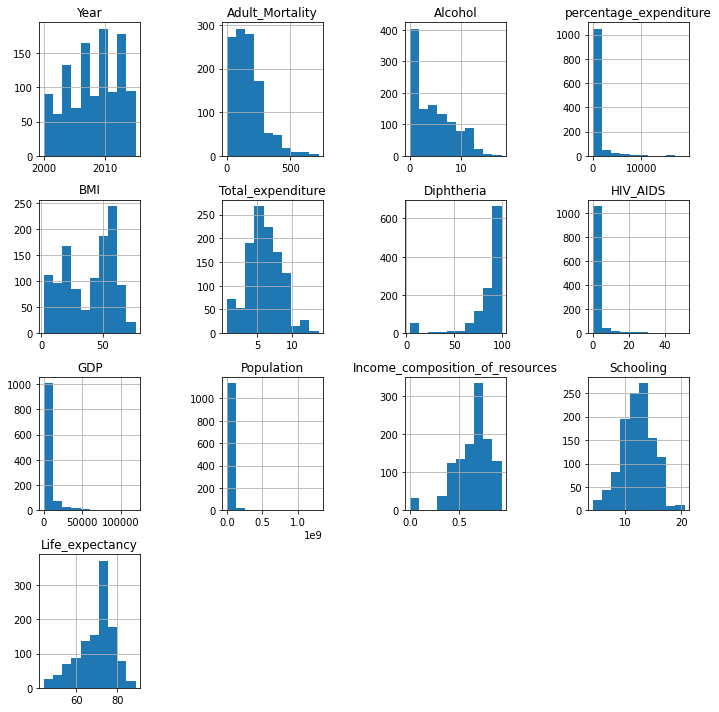

In [5]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10))
plt.tight_layout()

##### Q1. What can you infer from the histograms? <br/>
We can infer from these histograms that almost none of these variables are normally distributed except for perhaps schooling or total_expenditure.

Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

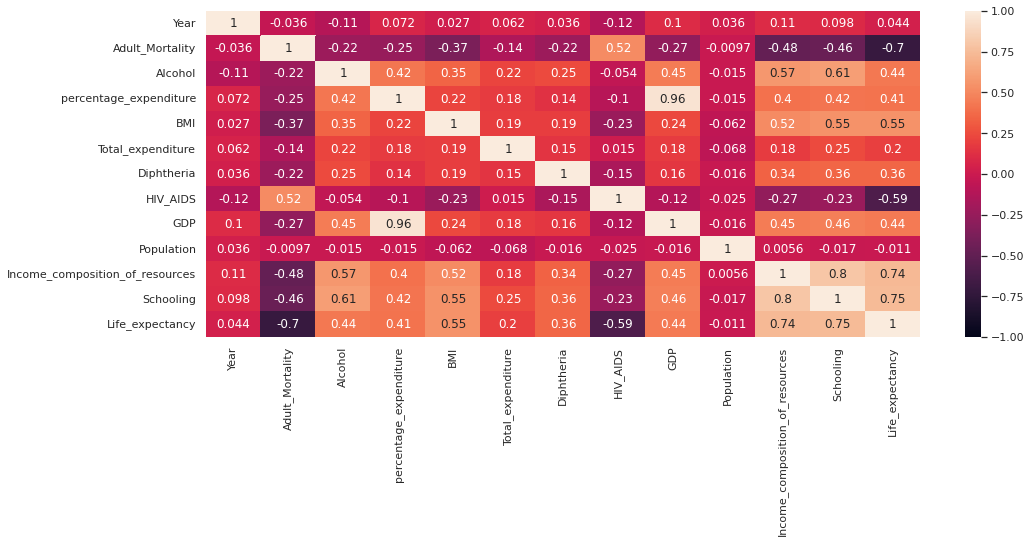

In [6]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
The sequence of the columns is the same as the sequence of the rows, so each variable lines up with itself and every variable is obviously correlated 100% with itself.

##### Q3. Why is the matrix symmetric along diagonal?<br/>
If we look at column 2 row 1, we see that adult mortality and year will have the same correlation as row 2 column 1 which is also just year and adult mortality. This trend follows for the rest of the values, making it symmetric.

##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with Life_expectancy as the outcome, which one would you choose and why? <br/>
If we had to choose one predictor, we would choose Schooling because it has the highest absolute value for the correlation of 0.75.


### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set. 

In [7]:
uploaded_test = files.upload()

df_test = pd.read_csv(io.BytesIO(uploaded_test['LifeExpectancy_test.csv']))

Saving LifeExpectancy_test.csv to LifeExpectancy_test.csv


In [8]:
from sklearn.preprocessing import StandardScaler
df_nostatus = df.drop(labels = ["Status", "Year"], axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(df_nostatus.values)
df_nostatus_test = df_test.drop(labels = ["Status", "Year"], axis=1)
scaler = StandardScaler()
scaled_test = scaler.fit_transform(df_nostatus_test.values)
print(scaled)
print(scaled_test)

[[-0.59622952 -0.74612198  0.0587886  ...  0.66890328  0.36104884
   0.61457758]
 [-0.11139872  0.46219017  0.03349841 ...  0.55390876  0.50518111
   0.56896695]
 [-0.8016663   1.81280354 -0.35064544 ...  1.37529816  1.26187553
   1.31013972]
 ...
 [-1.26184468 -0.78856269 -0.07838934 ...  0.38415495  0.79344565
   0.5803696 ]
 [ 0.61995622 -0.67871613 -0.35271302 ... -1.17100899 -1.36853841
  -0.71953341]
 [ 0.18443025 -0.86345807 -0.3842284  ... -0.78769393 -1.0442408
  -0.14940051]]
[[ 0.7560553  -1.09433358 -0.3876762  ... -0.17354749 -0.9124676
  -0.8611951 ]
 [ 0.8462535  -1.08943047 -0.3760072  ... -0.17622217 -1.026841
  -1.14381154]
 [-0.64953335  0.21969876 -0.12047126 ... -0.20235234  0.63429652
   0.48123299]
 ...
 [ 3.43945182 -0.22403231 -0.37913344 ... -0.0599785  -1.09219723
  -0.79054099]
 [ 4.07835575 -0.08184224 -0.38666925 ... -0.20413171 -1.17389252
  -0.93184921]
 [ 3.84534373 -0.67511804 -0.39208675 ... -0.07277722 -1.05951912
  -0.75521393]]


##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Some of the advantages of using Z-score normalization include having everything in the same scale for ease of comparison, and it can speed up the calculation. It can improve interpretation, particularly when you are comparing across variables with very different scales and means.

Some of the disadvantages of using Z-score normalization include it always assumes a normal distribution, and that it takes more work to transform it back to its original units later on.

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
We don't need to use the Z-score Normalization for this dataset because our histograms show that none of our features really follow a normal distribution.

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['Year', 'Status']])
df_onehot = enc.transform(df[['Year', 'Status']])

# Print the shape of your encoded X
print(df_onehot.shape)

(1154, 18)


In [45]:
X_train = pd.get_dummies(df, columns=['Year'])
X_train = pd.get_dummies(X_train, columns=['Status'])

X_test = pd.get_dummies(df_test, columns=['Year'])
X_test = pd.get_dummies(X_test, columns=['Status'])

X_train

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,93,1.57,835.062683,64.0,7.12,81,0.1,8734.965300,4588368.0,0.758,13.2,75.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,152,6.41,789.077295,32.4,4.12,99,0.1,5941.847100,68416772.0,0.737,13.6,74.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,68,11.82,90.585012,56.6,11.14,95,0.1,554.715320,8479375.0,0.887,15.7,81.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,135,0.01,1.576409,59.9,5.57,94,0.1,12.277330,1998979.0,0.797,14.7,74.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,192,5.93,27.638103,2.2,3.70,96,0.7,296.546170,6473164.0,0.657,11.5,71.4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,158,0.01,3.379875,16.6,1.29,82,0.1,117.765674,1184366.0,0.620,12.5,67.7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1150,66,10.31,6187.062017,62.0,8.49,92,0.1,36118.283810,26979.0,0.915,20.3,81.2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1151,12,1.40,585.630786,55.6,6.18,99,0.1,4129.977335,1521834.0,0.706,14.4,74.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1152,241,1.84,86.825511,16.4,5.77,69,1.2,468.567249,92444183.0,0.422,8.4,63.3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [46]:
X_test

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Status_Developed,Status_Developing
0,275,0.01,7.097109,17.2,7.87,68,0.1,63.537231,2978599.0,0.454,9.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,287,0.03,25.873925,15.7,8.33,64,0.1,373.361116,2729431.0,0.433,8.7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,88,5.37,437.062100,55.1,5.71,99,0.1,4437.178680,295195.0,0.738,13.3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,15,5.16,26.993121,49.9,6.12,98,0.1,279.142931,311487.0,0.685,10.8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,18,4.29,14.719289,47.9,6.27,97,0.1,189.681557,339616.0,0.674,10.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,526,2.25,1.860004,18.8,6.11,81,15.9,13.154199,12383446.0,0.479,10.9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
491,527,5.21,53.308581,29.4,5.37,89,15.7,713.635620,1486317.0,0.436,10.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
492,632,3.56,20.843429,28.6,4.96,75,20.5,325.678573,13558469.0,0.421,9.7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
493,717,4.14,8.717409,27.5,6.44,68,30.3,444.765750,129432.0,0.406,9.3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


Below, we wanted to confirm our correlation of year with life expectancy and by looking at the heat map below, we can see that there's very little correlation between any of the variables with life expectancy.

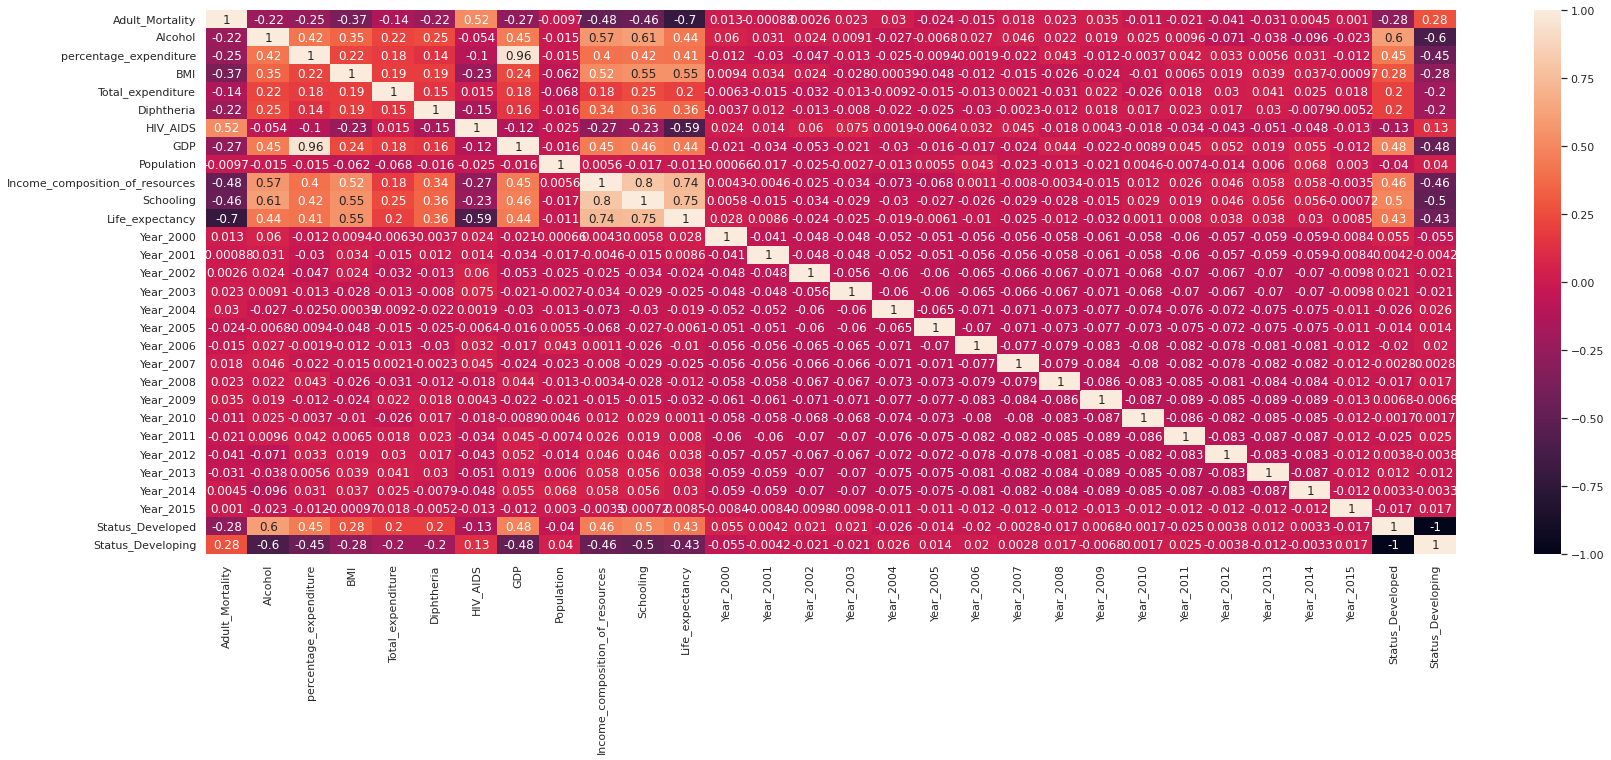

In [43]:
plt.figure(figsize=(28, 10))
heatmap_1 = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True)

Q7. What are the advantages and disadvantages of using One-hot encoding?

Advantages include:
*   Allows for ML models to interpret categorical data
*   The values for One-hot encoding are just in binary which keeps it simple.

Disadvantages include:
*   If you have a ton of categories, it will increase the number of variables that you'll have to add.
*   You have to make sure that your training set and test set have the same number of variables. Can't extrapolate past what you in your training set.



## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
x_train = X_train.drop(labels = 'Life_expectancy', axis=1)
y_train = X_train["Life_expectancy"]

LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
### Evaluate the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error
reg = LR.fit(x_train,y_train)
y_pred = reg.predict(x_train)
mean_squared_error(y_train, y_pred)

12.965318722949506

Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

In [14]:
x_train_cols = list(x_train)

for i in range(len(reg.coef_)):
  print(f'{x_train_cols[i]:<35} {reg.coef_[i]}')

Adult_Mortality                     -0.016895133880057894
Alcohol                             -0.12232993285139958
percentage_expenditure              0.0003038004337552783
BMI                                 0.03660418979372568
Total_expenditure                   0.09818516292352612
Diphtheria                          0.02177160772765393
HIV_AIDS                            -0.4723350832676772
GDP                                 1.9283867674426897e-05
Population                          -9.50609427948897e-10
Income_composition_of_resources     11.187605736748324
Schooling                           0.9558728013252112
Year_2000                           1.4578299889133228
Year_2001                           0.6436633149966416
Year_2002                           0.3917046308750241
Year_2003                           0.6828231106983303
Year_2004                           0.39571507565946906
Year_2005                           0.3773541218632128
Year_2006                           0.0833989

Q9. Is there a problem of multicollinearity? Explain what you can do

There is a problem of multicollinearity if we look back at our correlation matrix, we can see that variables like schooling and income composition of resources, or GDP and percentage_expenditure are highly correlated with each other. In order to solve this issue of multicollinearity, we can remove one of the highly correlated independent variables. To figure out which variable to remove, we can compare models after removal of each variable and choose the model that has the highest adjusted R squared.

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. 

Fill in the code for calculation of R2 score 

In [15]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [16]:
x_train_1 = np.array(x_train['Schooling']).reshape(-1, 1)
reg_1 = LinearRegression().fit(x_train_1, y_train)

y_1_pred = reg_1.predict(x_train_1)

r2_score_1 = r2_score(y_train, y_1_pred)

print(r2_score_1)

0.5575121346397232


$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [17]:
x_train_2 = x_train[["Schooling", "Adult_Mortality"]]
reg_2 = LinearRegression().fit(x_train_2, y_train) 

y_2_pred = reg_2.predict(x_train_2)

r2_score_2 = r2_score(y_train, y_2_pred)

print(r2_score_2)

0.7223314341007621


$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [18]:
x_train_3 = x_train[['Schooling', 'Adult_Mortality', 'Population']]
reg_3 = LinearRegression().fit(x_train_3, y_train)

y_3_pred = reg_3.predict(x_train_3)

r2_score_3 = r2_score(y_train, y_3_pred)

print(r2_score_3)

0.7223745101723086


You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score

Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [19]:
def adj_r2(r2, n, k):
  """Define our Adjusted R squared function."""
  adjust_r2 = 1 - (((1-r2) * (n-1)) / (n-k-1))
  return adjust_r2

adj_r2(r2_score_1, len(x_train_1), 1)

0.5571280305899313

Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [20]:
adj_r2(r2_score_2, len(x_train_2), 2)

0.7218489517968537

Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [21]:
adj_r2(r2_score_3, len(x_train_3), 3)

0.7216502697640624

### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [47]:
# Design a function to implement 5-fold cross-validation. 
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.

def cross_val_mse(X, y, f=5):
    """Create a cross validation function that takes the average MSE."""
    mse_lst = []

    X_shuffled = X.sample(frac=1, random_state=2)
    y_shuffled = y.sample(frac=1, random_state=2)

    X_split = np.array_split(X_shuffled, f) 
    y_split = np.array_split(y_shuffled, f)

    for i in range(f):
      # validation data in K-fold
      fold_val_X = X_split[i]
      fold_val_y = y_split[i]
      index1 = fold_val_X.index
      index2 = fold_val_y.index

      # training data in K-fold
      fold_train_X = X_shuffled.drop(index1)
      fold_train_y = y_shuffled.drop(index2)

      # using training data to test validation data
      reg = LR.fit(fold_train_X, fold_train_y)
      y_pred = reg.predict(fold_val_X)
      mse = mean_squared_error(fold_val_y, y_pred)
      mse_lst.append(mse)
    
    return sum(mse_lst)/len(mse_lst)

In [29]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE 
from itertools import combinations 

x_train_final = x_train[col_names]

col_names = ['Adult_Mortality', 'Alcohol', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Population',  
             'Diphtheria', 'HIV_AIDS', 'GDP', 'Income_composition_of_resources', 'Schooling', 'Status_Developed', 'Status_Developing']

combs = []
for i in range(1, len(col_names)+1):
  element = [list(x) for x in combinations(col_names, i)]
  combs.extend(element)

all_mse = []

for combo in combs:
  all_mse.append(cross_val_mse(x_train_final[combo], y_train, f=5))

print(min(all_mse))

13.705846320991773


In [31]:
index_mse = all_mse.index(min(all_mse))
combs[index_mse]

print(min(all_mse))
print(combs[index_mse])


13.705846320991773
['Adult_Mortality', 'percentage_expenditure', 'BMI', 'Population', 'Diphtheria', 'HIV_AIDS', 'Income_composition_of_resources', 'Schooling']


### Test your model
Now, apply your best model to predict the target values from the test feature set "LifeExpectancy_test.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [41]:
x_train_final = x_train[['Adult_Mortality', 'percentage_expenditure', 'BMI', 'Population', 'Diphtheria', 'HIV_AIDS', 'Income_composition_of_resources', 'Schooling']]
x_test_final = X_test[['Adult_Mortality', 'percentage_expenditure', 'BMI', 'Population', 'Diphtheria', 'HIV_AIDS', 'Income_composition_of_resources', 'Schooling']]

reg_final = LinearRegression().fit(x_train_final, y_train)
y_pred = reg_final.predict(x_test_final) 


In [42]:
y_pred


array([62.60776589, 61.3030791 , 74.69193598, 72.76551534, 72.40248231,
       72.52421759, 70.51438206, 72.04087555, 63.06003915, 63.02613393,
       61.69344918, 58.8038561 , 77.4284351 , 77.0374984 , 79.24967308,
       76.79454461, 75.28083054, 73.27361913, 73.23515596, 72.4512947 ,
       70.26482877, 70.40768105, 89.12751428, 88.33245654, 81.63760871,
       82.70255393, 81.55814327, 80.74964375, 80.75685307, 78.55338817,
       72.96903887, 72.01262291, 71.3623369 , 69.71462223, 69.31251325,
       67.46313   , 68.48051835, 65.21309618, 65.24275215, 64.39040732,
       64.26294623, 63.70535603, 73.43605547, 74.17870195, 69.61409978,
       71.20943798, 79.59692453, 79.42573937, 80.56464359, 78.07707771,
       80.98474413, 80.97589166, 71.56381452, 71.35176192, 71.60400017,
       71.09760626, 70.65689549, 68.2791696 , 64.44393741, 60.93171947,
       59.67548691, 59.27875509, 68.71797455, 60.24233574, 57.82866961,
       60.91312775, 72.2899034 , 73.59397255, 65.78978887, 59.93

In [ ]:
#end